In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from Unet import *
from train_Unet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

c:\Users\gaynuliy\Anaconda3\envs\home\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


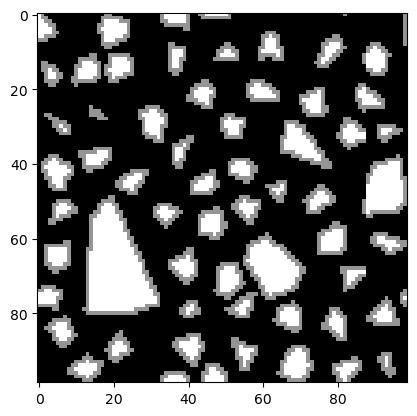

In [3]:
data = dataset(128, 'simple')
img, label = data.__getitem__(0)
loaders = get_loaders(data, 16)
plt.imshow(img[0], cmap='Greys')

In [4]:
args = {'lr' : 0.0001, 'epochs' : 200, 'dev' : dev, 'name' : 'Simple_Unet'}

In [5]:
unet = UNet()

In [6]:
unet = load_network(unet, args['name'], args)

In [7]:
losses_train, losses_val = train(unet, loaders, args)

c:\Users\gaynuliy\Anaconda3\envs\home\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0 batch: 0 mean train loss:  2595.7446289062
Epoch: 0 batch: 200 mean train loss:  2517.1782226562
Epoch: 0 batch: 400 mean train loss:  2588.3024902344
Epoch: 0 batch: 600 mean train loss:  2667.9584960938
Epoch: 0 mean train loss:  2628.7174824219 mean val. rec. loss:  2645.9103893229
Epoch: 1 batch: 0 mean train loss:  2787.5678710938
Epoch: 1 batch: 200 mean train loss:  2597.7038574219
Epoch: 1 batch: 400 mean train loss:  2704.4077148438
Epoch: 1 batch: 600 mean train loss:  2685.7343750000
Epoch: 1 mean train loss:  2631.6793902995 mean val. rec. loss:  2644.3372265625
Epoch: 2 batch: 0 mean train loss:  2624.7558593750
Epoch: 2 batch: 200 mean train loss:  2635.3955078125
Epoch: 2 batch: 400 mean train loss:  2611.0021972656
Epoch: 2 batch: 600 mean train loss:  2603.5490722656
Epoch: 2 mean train loss:  2628.7719518229 mean val. rec. loss:  2641.9862539063
Epoch: 3 batch: 0 mean train loss:  2578.9162597656
Epoch: 3 batch: 200 mean train loss:  2594.5981445312
Epoch: 3 

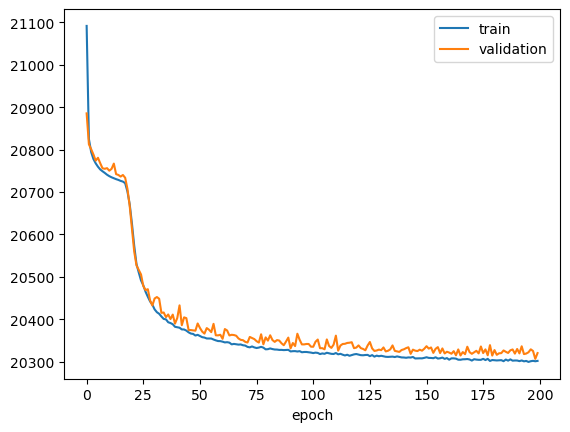

In [8]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

In [24]:
train_data = next(iter(loaders['train']))[0].to(args['dev'])

In [8]:
unet = unet.to(args['dev'])

In [9]:
y = unet(train_data)